In [87]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
csv_filename = ""
if csv_filename:
    df = pd.read_csv()
else:
    list_of_files = glob.glob('stats/*')
    latest_csv = max(list_of_files, key=os.path.getctime)
    df = pd.read_csv(latest_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       720 non-null    object 
 1   optim      720 non-null    int64  
 2   size       720 non-null    int64  
 3   time       720 non-null    float64
 4   bandwidth  720 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 28.3+ KB


In [89]:
def create_scatter_subplot(ax, data, optims, name, scale="linear"):
    for optim in optims:
        optim_data = data[data[:,1] == optim]
        x = np.array(optim_data[:,2], dtype=np.float32) # Get matrix sizes
        y = np.array(optim_data[:,3], dtype=np.float32) # Get execution time
        if scale == "log":
            plt.yscale("log")
        ax.scatter(x, y, label=f"-O{optim}")
        ax.legend(loc="upper left")
        ax.set_ylabel("Seconds")
        ax.set_xlabel("Matrix size")
        ax.title.set_text(name)

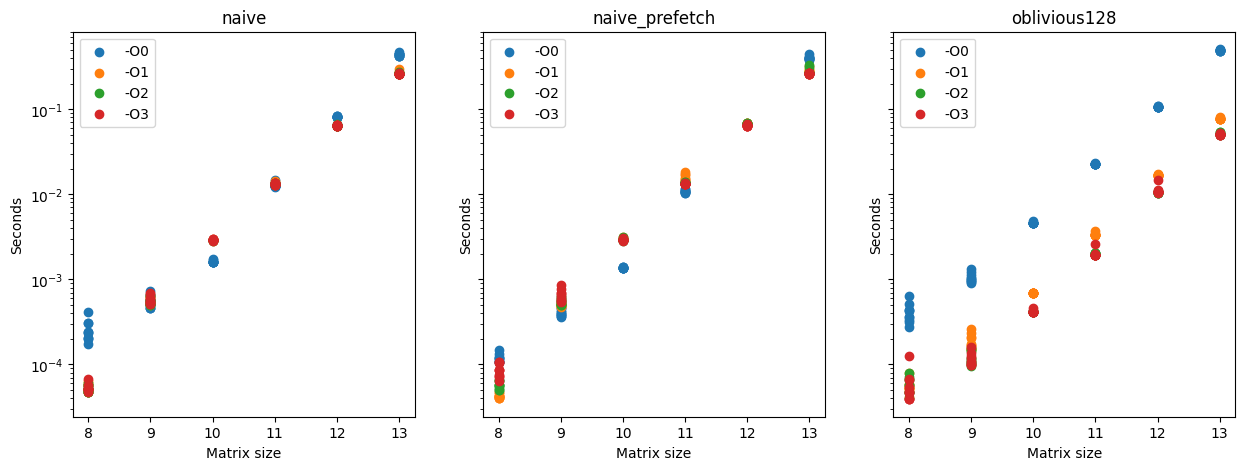

In [90]:
optims = df["optim"].unique()
names = df["name"].unique()

fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

for i, name in enumerate(names):
    data = df[df["name"] == name].to_numpy()
    create_scatter_subplot(ax[i], data, optims, name, scale="log")
plt.show()

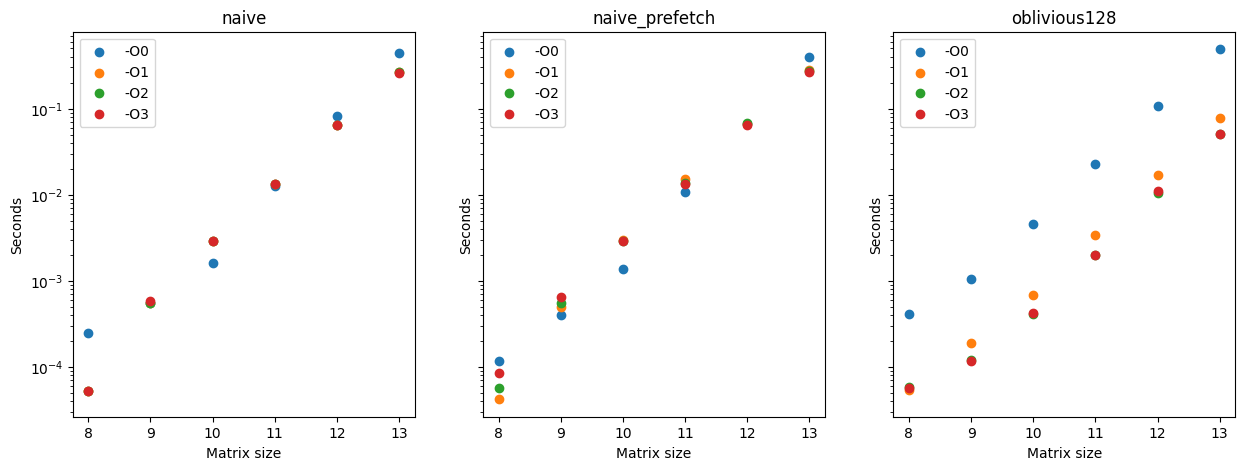

In [91]:
fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

means = df.groupby(['name', 'optim', 'size']).mean()
stds = df.groupby(['name', 'optim', 'size']).std()
for i, name in enumerate(names):
    for optim in optims:
        datapoints = means.loc[name, optim]
        x = list(datapoints.index)
        y = list(datapoints['time'])
        plt.yscale("log")
        ax[i].scatter(x, y, label=f"-O{optim}")
        ax[i].legend(loc="upper left")
        ax[i].set_ylabel("Seconds")
        ax[i].set_xlabel("Matrix size")
        ax[i].title.set_text(name)
plt.show()

In [94]:
optim_lvl = 3
means.loc['naive', optim_lvl], means.loc['naive_prefetch', optim_lvl], means.loc['oblivious128', optim_lvl]

(          time  bandwidth
 size                     
 8     0.000053   9.936495
 9     0.000581   3.650113
 10    0.002894   2.899252
 11    0.013192   2.544341
 12    0.064352   2.085837
 13    0.261247   2.055136,
           time  bandwidth
 size                     
 8     0.000086   6.265835
 9     0.000652   3.279082
 10    0.002895   2.898840
 11    0.013265   2.529843
 12    0.064459   2.082529
 13    0.263126   2.040540,
           time  bandwidth
 size                     
 8     0.000057  10.383204
 9     0.000116  18.525454
 10    0.000422  19.875850
 11    0.001997  16.936360
 12    0.011071  12.235663
 13    0.050731  10.584962)